# Image Processing

## Basics with numpy/scipy/matplotlib

In [2]:
import numpy as np
import scipy as sp
import scipy.ndimage as spi
import matplotlib
import pylab as pl
%matplotlib inline


#### load and show an image:

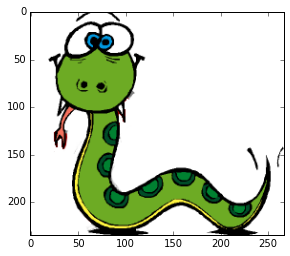

In [3]:
image = spi.imread("python.png")

pl.imshow(image)

#### data type of images:

In [4]:
print(type(image))

<class 'numpy.ndarray'>


In [5]:
print(image.dtype)

uint8


In [6]:
print(image.shape)

(235, 267, 3)


In [7]:
print(image.size)

188235


In [8]:
print(image[:2,:2])

[[[255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]]]


## Indexing

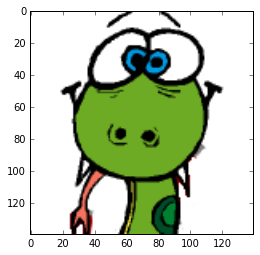

In [9]:
pl.imshow(image[:140,:140])

## Thresholding

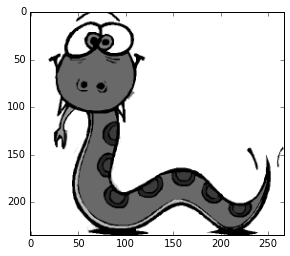

In [10]:
#For simplicity, we convert the image to gray scales
image_gray = np.sum(image,axis=2)
image_gray = 256 * image_gray / np.max(image_gray) 

#pl.imshow(image_gray)
pl.imshow(image_gray, cmap=matplotlib.cm.gray)

(0, 10000)

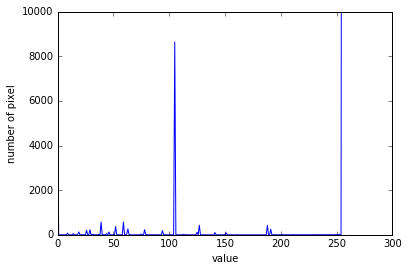

In [11]:
#let's have a look at the histogram:
hist,bins = np.histogram(image_gray,bins=256) 
pl.plot(hist)
pl.xlabel("value")
pl.ylabel("number of pixel")
pl.ylim(0,10000)


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:8: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


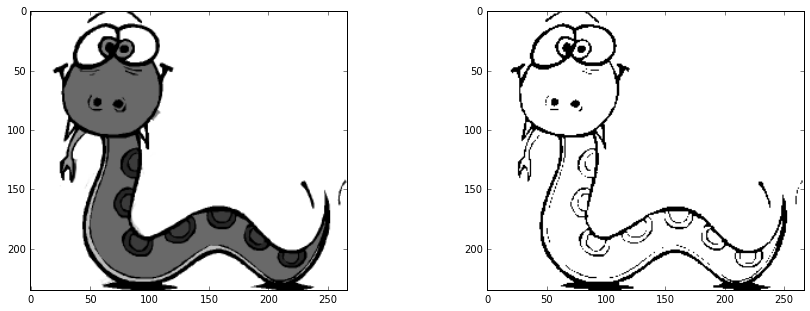

In [12]:
#Threshold image
image2 = image_gray < 5

pl.figure(figsize=(15,5))
pl.subplot(121)
pl.imshow(image_gray, cmap=matplotlib.cm.gray)
pl.subplot(122)
pl.imshow(-image2, cmap=matplotlib.cm.gray)


## Low-pass and High-pass filter with fourier transformations

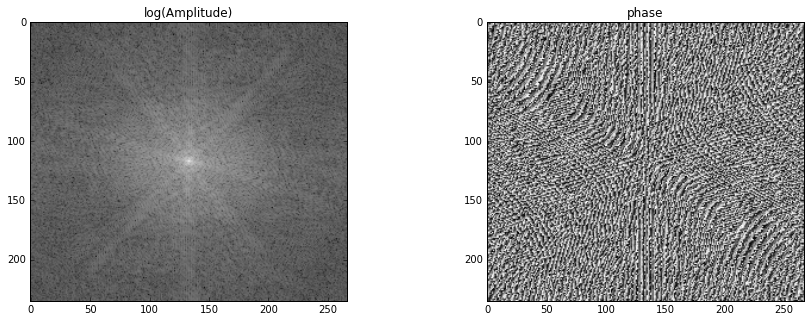

In [13]:
#Fourier transformation
image_fft = np.fft.fftshift(np.fft.fft2(image_gray))

pl.figure(figsize=(15,5))
pl.subplot(121)
pl.imshow(np.log(np.abs(image_fft)),cmap = matplotlib.cm.gray)
pl.title("log(Amplitude)")
pl.subplot(122)
pl.imshow(np.angle(image_fft),cmap = matplotlib.cm.gray)
pl.title("phase")


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


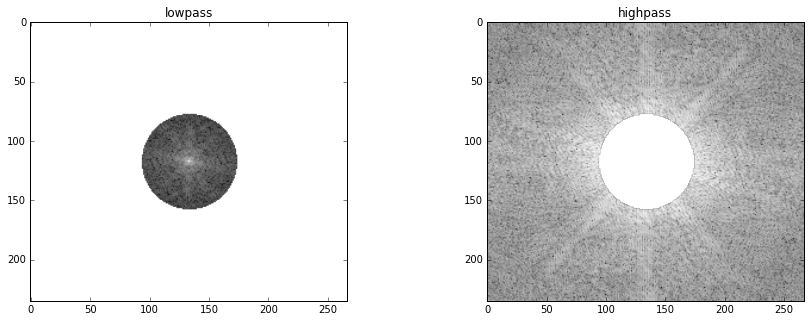

In [14]:
#apply filters
h,w = image_gray.shape
radius = 40
lowpass = np.fromfunction(lambda i,j: np.sqrt((i-0.5*h)**2+(j-0.5*w)**2) < radius, image_gray.shape)
highpass = - lowpass
image_fft_lowpass = np.where(lowpass,image_fft,0)
image_fft_highpass = np.where(highpass,image_fft,0)

pl.figure(figsize = (15,5))
pl.subplot(121)
pl.imshow(np.log(np.abs(image_fft_lowpass)),cmap = matplotlib.cm.gray)
pl.title("lowpass")
pl.subplot(122)
pl.imshow(np.log(np.abs(image_fft_highpass)),cmap = matplotlib.cm.gray)
pl.title("highpass")


(6.45031703385e-16-3.17080191271e-18j)


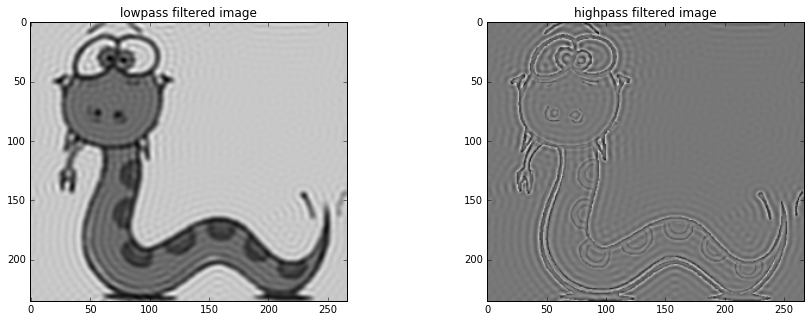

In [15]:
#inverse fourier transformation
image_ifft_lowpass = np.fft.ifft2(np.fft.ifftshift(image_fft_lowpass))
image_ifft_highpass = np.fft.ifft2(np.fft.ifftshift(image_fft_highpass))

pl.figure(figsize = (15,5))
pl.subplot(121)
pl.imshow(np.real(image_ifft_lowpass), cmap = matplotlib.cm.gray)
pl.title("lowpass filtered image")
pl.subplot(122)
pl.imshow(np.real(image_ifft_highpass), cmap = matplotlib.cm.gray)
pl.title("highpass filtered image")
print(np.mean(np.ravel(image_ifft_highpass)))

# Colorspaces

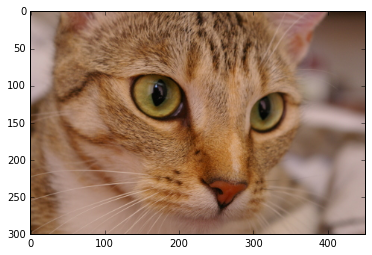

In [16]:
import skimage
import skimage.data as data
image = data.chelsea()
pl.imshow(image)

## Greyscale

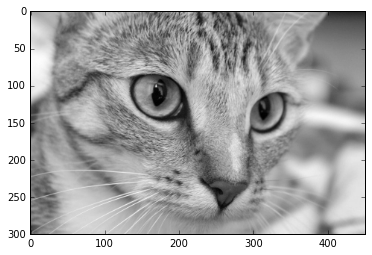

In [17]:
image_grey = skimage.color.rgb2grey(image)
pl.imshow(image_grey, cmap = pl.cm.gray)

## Red-Green-Blue (RGB)

<function __main__.show_image>

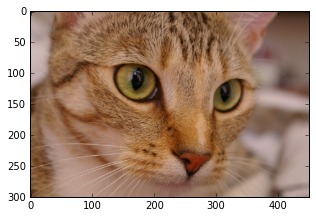

In [18]:
from IPython.html.widgets import interact

def show_image(r_shift, g_shift, b_shift):
    fig, ax = pl.subplots(figsize=(5,5))
    image2 = np.array(image,dtype=np.int16) + np.array([r_shift, g_shift, b_shift],dtype=np.int16)
    ax.imshow(np.array(image2,dtype=np.uint8))
interact(show_image, r_shift = (-255,255,1), g_shift = (-255,255,1), b_shift = (-255,255,1))

## Hue-Saturation-Value (HSV)

<function __main__.show_image>

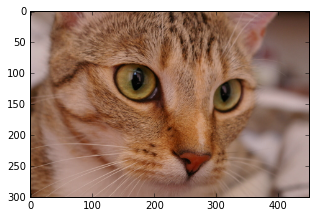

In [19]:
image_hsv = skimage.color.convert_colorspace(image,'RGB','HSV')

def show_image(hue_shift, saturation_shift, value_shift):
    fig, ax = pl.subplots(figsize=(5,5))
    image_hsv2 = image_hsv + np.array([hue_shift,saturation_shift,value_shift])
    image_rgb2 = skimage.color.convert_colorspace(np.clip(image_hsv2, 0, 1),'HSV','RGB')
    ax.imshow(image_rgb2)
interact(show_image, hue_shift = (-1,1,0.01), saturation_shift = (-1,1,0.01), value_shift = (-1,1,0.01))

# Modules for Advanced Image Processing

* scipy.ndimage
* Pillow ("PIL")
* scikit-image
* Mahotas
* simpleITK
* openCV
* ...

Note: All of these modules use numpy arrays, functions from different modules can be used together!

# Example: Blob detection

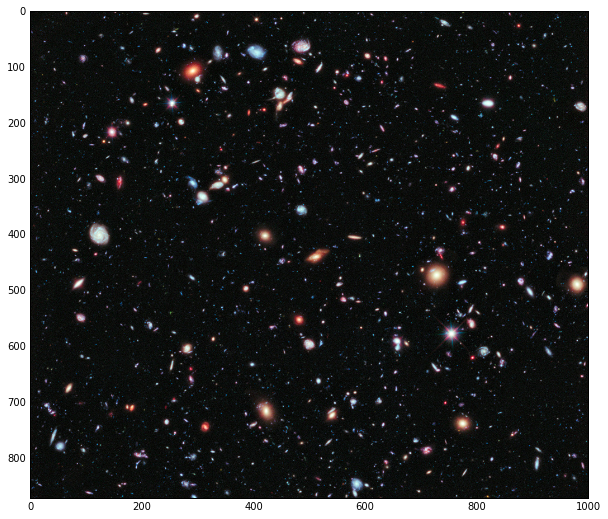

In [22]:
from skimage import data
image_full = data.hubble_deep_field()
pl.figure(figsize=(10,10))
pl.imshow(image_full)

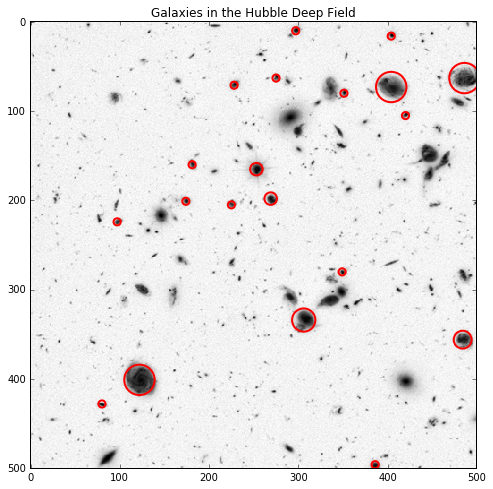

In [23]:
from skimage.feature import blob_doh
from skimage.color import rgb2gray

from IPython.html.widgets import interact

# Extract the first 500px square of the Hubble Deep Field.
image = image_full[0:500, 0:500]
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=30, threshold=0.1, gray=False):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = pl.subplots(figsize=(8,8))
    ax.set_title('Galaxies in the Hubble Deep Field')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = pl.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)

# Use interact to explore the galaxy detection algorithm.
interact(plot_blobs, max_sigma=(10, 40, 2), threshold=(0.005, 0.02, 0.001));

#### more examples: [scikit-image gallery](http://scikit-image.org/docs/stable/auto_examples/)